## Use Astropy to analyze FITS images
Based on a tutorial by Lia Corrales

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

### Open the FITS file

In [3]:
fname = "Horsehead.fits"
hdu_list = fits.open(fname)
hdu_list.info()

Filename: Horsehead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [7]:
header = hdu_list[0].header

In [9]:
print (header)

SIMPLE  =                    T /FITS: Compliance                                BITPIX  =                   16 /FITS: I*2 Data                                  NAXIS   =                    2 /FITS: 2-D Image Data                            NAXIS1  =                  891 /FITS: X Dimension                               NAXIS2  =                  893 /FITS: Y Dimension                               EXTEND  =                    T /FITS: File can contain extensions               DATE    = '2014-01-09        '  /FITS: Creation Date                            ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                REGION  = 'ER768   '           /GSSS: Region Name                               PLATEID = 'A0JP    '           /GSSS: Plate ID                                  SCANNUM = '01      '           /GSSS: Scan Number                               DSCNDNUM= '00      '           /GSSS: De

### Generally the image information is located in the PRIMARY block. The blocks are numbered and can be accessed by indexing hdu_list

In [4]:
image_data = hdu_list[0].data

### Our data is now stored as a 2D numpy array. But how do we know the dimensions of the image? We can simply look at the shape of the array

In [5]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


### At this point, we can close the FITS file because we've stored everything we wanted to in a variable

In [6]:
hdu_list.close()

### Shortcut: use "getdata()" to just read in the image data and close the file

In [10]:
image_data = fits.getdata(fname)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


### Let's show the data

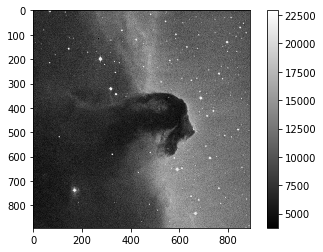

In [16]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

### Let's get some basic statistics about our image

In [12]:
print('Min:' , np.min(image_data))
print('Max:' , np.max(image_data))
print('Mean' , np.mean(image_data))
print('Stdev' , np.std(image_data))

Min: 3759
Max: 22918
Mean 9831.481676287574
Stdev 3032.3927542049046


### Plotting a histogram
To make a histogram with matplotlib.pyplot.hist(), we'll need to cast the data from a 2d array to something one dimensional.
In this case, let's use the ndarray.flatten() to return a 1D numpy array

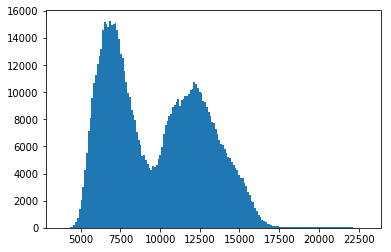

In [13]:
histogram = plt.hist(image_data.flatten(), bins='auto')

### Dislaying the image with a logarithmic scale
What if we want to use a logarithmic color scale? To do so, we can load the LogNorm object from matplotlib.

In [18]:
from matplotlib.colors import LogNorm

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

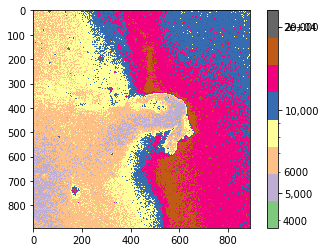

In [45]:
plt.imshow(image_data, cmap='Accent', norm=LogNorm())

#Choose tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

### Stacking images
Since noise in an image from a random process, we use stacking of separate images to improve the signal to noise ratio of objects we observe. Here we are going to stack 5 images of M13 taken with a 10 inch telescope

In [29]:
#make a list of filenames
image_list = ['M13_blue_0001.fits', 'M13_blue_0002.fits', 'M13_blue_0003.fits', 'M13_blue_0004.fits', 'M13_blue_0005.fits']

In [31]:
#Make an array of images from the list of images 
image_concat = [fits.getdata(image) for image in image_list]

In [32]:
#sum the images together
final_image = np.sum(image_concat, axis=0)

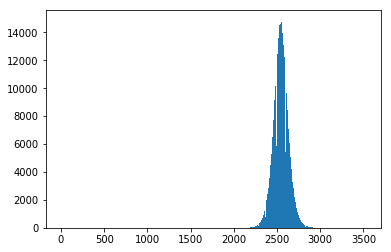

In [33]:
#plot a histogram of the image pixel values
image_hist = plt.hist(final_image.flatten(), bins='auto')

We'll use the keywords vmin and vmax to set limits on the color scaling for imshow

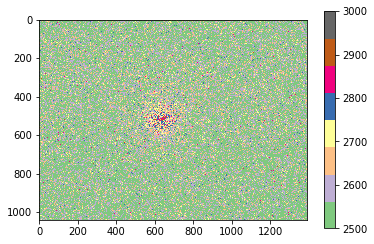

In [46]:
plt.imshow(final_image, cmap='Accent', vmin=2.5E3, vmax=3E3)
plt.colorbar()

### Writing a new FITS file
We can easily do this with the writeto() method
Warning: you'll recieve an error if the file you are trying to write already exists. That's why we've set clobber=True

In [47]:
outfile = 'stacked_M13_blue.fits'
hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)

In [ ]:
file = 'stacked_M13_blue.fits'
